In [2]:
# 구글 계정 액세스
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
tf.__version__

import matplotlib

In [4]:
# 이미지 불러오기
import os

path = "/content/drive/MyDrive/Colab/all"
image_list = os.listdir(path)
image_list_png = [image for image in image_list if image.endswith(".png")]

print('image_list_png :{}'.format(image_list_png))

image_list_png :[]


In [5]:
# 이미지 불러오기
import PIL
import glob

imgs = glob.glob('/content/drive/MyDrive/Colab/all/*.png')

for img in imgs:
    try:
        img = PIL.Image.open(img)
    except PIL.UnidentifiedImageError:
        print(img)

In [6]:
# 클래스별 갯수 
import os, shutil
original_dataset_dir = '/content/drive/MyDrive/Colab/all/'

folder_list = []
for path_ in os.listdir(original_dataset_dir):
    if path_.startswith('.'):
        pass
    else:
        path2 = original_dataset_dir + path_
        folder_list.append(path_)
        
print(folder_list)

plant_cnt = {}
for path in folder_list:
    plant_cnt[path] = len(os.listdir(original_dataset_dir+path))
    
print(plant_cnt)

['yeoincho', 'stuckyi', 'monstera', 'tableyaja', 'geumjeonsoo']
{'yeoincho': 1397, 'stuckyi': 1460, 'monstera': 1665, 'tableyaja': 990, 'geumjeonsoo': 1508}


In [7]:
# datasets 파일 만들기
base_dir = '/content/drive/MyDrive/Colab/res50/' 
os.mkdir(base_dir)
# datasets 파일 안에 Plant 파일 만들기
base_dir = '/content/drive/MyDrive/Colab/res50/Plant' # 소규모 데이터셋 저장할 디렉토리
os.mkdir(base_dir)

In [8]:
# 훈련, 검증, 테스트 폴더 만들기
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

os.mkdir(train_dir)
os.mkdir(valid_dir)
os.mkdir(test_dir)

In [9]:
# 이미지 데이터 이름 변경 (순서매기기) -> 지금 all파일에 순서 정리 다 돼있어서 또 돌리면 데이터 손실있음!
for path in folder_list:
    i = 1
    for imgPath in os.listdir(original_dataset_dir+path):
        src = os.path.join(original_dataset_dir+path, imgPath)
        dst_ = path + '_' + str(i) + '.png'
        dst = os.path.join(original_dataset_dir+path, dst_)
        
        print(src)
        print(dst)
        print('-' * 40)
        
        os.rename(src, dst)
        i += 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja_832.png
----------------------------------------
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja1920.png
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja_833.png
----------------------------------------
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja1926.png
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja_834.png
----------------------------------------
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja1933.png
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja_835.png
----------------------------------------
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja1927.png
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja_836.png
----------------------------------------
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja1932.png
/content/drive/MyDrive/Colab/all/tableyaja/tableyaja_837.png
----------------------------------------
/content/drive/MyDrive/Colab/all/tableyaja/tabl

In [10]:
# 안열리는 파일 삭제 
import PIL, glob
from PIL import Image
from os import remove

datalist = ['train', 'test', 'valid']

for data in datalist : 
    imgs_ = glob.glob(f"/content/drive/MyDrive/Colab/res50/Plant/{data}/*/*.png")

    for img in imgs_:
        try:
            img = PIL.Image.open(img)
        except PIL.UnidentifiedImageError:
            print(img)
            remove(img)

In [11]:
# 데이터 나누기
data_list = [train_dir, valid_dir, test_dir]

for dataset in data_list:
    print('dataset : ',dataset)
    for plant in plant_cnt:
        filePath_ = os.path.join(dataset, plant)
        os.mkdir(filePath_)

        # 데이터 개수의 반틈 train 폴더에 복사
        if dataset == data_list[0]:
            cnt = int(int(plant_cnt[plant])/2)
            fnames = ['{}_{}.png'.format(plant, i+1) for i in range(0,cnt)]
            print(cnt)
            print(plant,'- train_dir len :', len(fnames))
        
        elif dataset == data_list[1]:
            cnt = int(int(plant_cnt[plant])/2)
            cnt3 = int((int(plant_cnt[plant])/4)*3)
            fnames = ['{}_{}.png'.format(plant, i+1) for i in range(cnt,cnt3)]
            print(plant,'- valid_dir len :', len(fnames))
            print("fnames : ",fnames)
        else :
            cnt3 = int((int(plant_cnt[plant])/4)*3)
            fnames = ['{}_{}.png'.format(plant, i+1) for i in range(cnt3,plant_cnt[plant])]
            print(plant, '-test_dir len :', len(fnames))
            
        for fname in fnames:
            src = os.path.join(original_dataset_dir,plant)
            src2 = os.path.join(src,fname)
            dst = os.path.join(filePath_,fname)
#             print(src2)
            print('dst :',dst)
            shutil.copyfile(src2,dst)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_614.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_615.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_616.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_617.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_618.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_619.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_620.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_621.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_622.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_623.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_624.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/monstera/monstera_625.png
dst : /content/d

In [12]:
for plant in plant_cnt:
    path_train = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/train',plant)
    print(plant)
    print('훈련용 이미지 개수 : ', len(os.listdir(path_train)))

    path_valid = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/valid',plant)
    print('valid 이미지 개수 : ', len(os.listdir(path_valid)))

    path_test = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/test',plant)
    print('test 이미지 개수 : ', len(os.listdir(path_test)))
    print('-' * 40)

yeoincho
훈련용 이미지 개수 :  698
valid 이미지 개수 :  349
test 이미지 개수 :  350
----------------------------------------
stuckyi
훈련용 이미지 개수 :  730
valid 이미지 개수 :  365
test 이미지 개수 :  365
----------------------------------------
monstera
훈련용 이미지 개수 :  832
valid 이미지 개수 :  416
test 이미지 개수 :  417
----------------------------------------
tableyaja
훈련용 이미지 개수 :  495
valid 이미지 개수 :  247
test 이미지 개수 :  248
----------------------------------------
geumjeonsoo
훈련용 이미지 개수 :  754
valid 이미지 개수 :  377
test 이미지 개수 :  377
----------------------------------------


In [13]:
# 모델 구성
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers

from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras import Input
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Input, activations, optimizers

import scipy
import matplotlib.pyplot as plt

In [42]:
# ResNet50 model 불러오기 
base_model = ResNet50(include_top=False, input_shape =(150,150, 3), weights = 'imagenet')
base_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [44]:
# ResNet50 전이학습 
base_model.trainable = False

## 모델 layer 설계
input = Input(shape=(None,None, 3))
model = ResNet50(input_tensor=input, include_top=False, weights='imagenet', pooling='max')
x = tf.keras.layers.experimental.preprocessing.Resizing(155,155)(input)
x = tf.keras.layers.experimental.preprocessing.CenterCrop(150,150)(x)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = base_model(x, training = False)
x = Flatten()(x)   # Fully Connected에 온전하게 학습을 위해 펼쳐준다 

# x = Dense(256, activation = 'relu')(x)
outputs = Dense(5, activation = 'softmax')(x) # Softmax 함수로 5개 분류

model_res = tf.keras.Model(model.input, outputs) # model_res 란 이름의 인풋과 아웃풋이 정해진 모델 생성

In [26]:
# # ResNet50 model 불러오기
# # from keras.applications import ResNet50
# from keras.layers import Dense, Input, Activation
# from keras.models import Model
# from keras.callbacks import EarlyStopping
# from keras import optimizers
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import BatchNormalization

# input = Input(shape=(224, 224, 3))
# model = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')
 
# x = model.output
# x = Dense(1024, name='fully', init='uniform')(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Dense(512, init='uniform')(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Dense(5, activation='softmax', name='softmax')(x)
# model_res = Model(model.input, x)
# model_res.summary()

- input_tensor : 입렵으로 받는 형태. 여기서는 224 by 224크기에 각 rgb채널 3의 shape이다.
- include_top : 가장 상단의 fully connected계층들을 포함 시킬지의 여부다.
- weight : 케라스에서 미리 pretraining 시켜놓은 weight을 사용 할 것인지 여부다.
- pooling : top layer를 포함시키지 않았을때 가장 상단부분의(직관적으로 봤을 때는 하단이지만...)max, avr pooling 방법을 셋팅 할 수 있다.
- include_top = False로 했을 때 fc계층이 없음.
- transfer learning같이 fc계층들만 트레이닝이 되고 있다면 아무 훈련되지 않은 weight값들로 생성된 feature들 만으로 이같은 accuracy가 나오지 않을 것이다.


In [45]:
# 모델 확인
model_res.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 resizing_4 (Resizing)       (None, 155, 155, 3)       0         
                                                                 
 center_crop_4 (CenterCrop)  (None, 150, 150, 3)       0         
                                                                 
 tf.__operators__.getitem_4   (None, 150, 150, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_4 (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        2358

In [46]:
model_res.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),  # RMSprop : 기울기를 단순 누적하지 않고 지수 가중 이동 평균 Exponentially weighted moving average 를 사용하여 최신 기울기들이 더 크게 반영되도록 하였다
             metrics = ['acc'])

In [47]:
# 모든 이미지를 1/255로 스케일을 조정
train_datagan = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    # preprocessing_function = forward
    ) # forward 정규화 
test_datagan = ImageDataGenerator(rescale=1./255)
# , preprocessing_function = forward

In [48]:
train_generator = train_datagan.flow_from_directory(
                                            train_dir, 
                                            target_size = (150,150),
                                            batch_size=24,
                                            class_mode='categorical')

Found 3509 images belonging to 5 classes.


In [49]:
validation_generator = test_datagan.flow_from_directory(
                                            valid_dir, 
                                            target_size = (150,150),
                                            batch_size=24,
                                            class_mode='categorical')

Found 1754 images belonging to 5 classes.


In [50]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습 
history = model_res.fit(train_generator,
                    validation_data=validation_generator,
                    # callbacks=[early],
                    epochs=50)


Epoch 1/50
147/147 [==============================] - 50s 311ms/step - loss: 4.8888 - acc: 0.4474 - val_loss: 1.4690 - val_acc: 0.6152
Epoch 2/50
147/147 [==============================] - 43s 294ms/step - loss: 2.7477 - acc: 0.5152 - val_loss: 4.4282 - val_acc: 0.4658
Epoch 3/50
147/147 [==============================] - 43s 295ms/step - loss: 2.7190 - acc: 0.5472 - val_loss: 1.9910 - val_acc: 0.6021
Epoch 4/50
147/147 [==============================] - 43s 290ms/step - loss: 2.8189 - acc: 0.5554 - val_loss: 5.4290 - val_acc: 0.4738
Epoch 5/50
147/147 [==============================] - 42s 288ms/step - loss: 3.4737 - acc: 0.5443 - val_loss: 4.5756 - val_acc: 0.5678
Epoch 6/50
147/147 [==============================] - 43s 290ms/step - loss: 3.0085 - acc: 0.5765 - val_loss: 2.8836 - val_acc: 0.5924
Epoch 7/50
147/147 [==============================] - 42s 288ms/step - loss: 3.2376 - acc: 0.5811 - val_loss: 4.1948 - val_acc: 0.5331
Epoch 8/50
147/147 [==============================] - 4

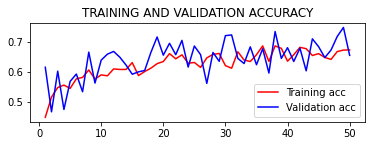

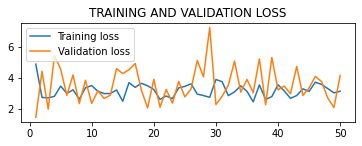

<Figure size 432x288 with 0 Axes>

In [54]:
# 모델 과적합 확인
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('TRAINING AND VALIDATION ACCURACY')
plt.legend()

plt.figure()
plt.subplot(2, 1, 2)
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('TRAINING AND VALIDATION LOSS')
plt.legend()

plt.show()
plt.savefig('/content/drive/MyDrive/Colab/model/model.png')

## sns 저장
# sfig = splot.get_figure()
# sfig.savefig('서울 전체 포함 공실률 최종.png')

In [52]:
# 모델 테스트
test_generator = test_datagan.flow_from_directory(test_dir, target_size=(224,224), batch_size=24, class_mode='categorical')
test_loss, test_acc = model_res.evaluate_generator(test_generator, steps=30)
print(f'test loss: {test_loss}, test acc: {test_acc}')

Found 1757 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


test loss: 4.429612636566162, test acc: 0.6597222089767456


In [ ]:
# # torch 모델 저장
# import torch
# def save_model(model, saved_dir):
#   os.makedirs(saved_dir, exist_ok=True) # 폴더가 존재하지 않으면 디렉토리를 생성함
#   check_point = {
#       # 'net' : model.state_dict()
#       # 'optim' : optimizer.state_dict()
#       # 'loss' : loss.state_dict()
#       # 'epoch' : epoch.state_dict()
#   }
#   torch.save(check_point, saved_dir+'/resnet50.pt')

In [53]:
# 모델 저장
# import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2

# model_type = 'resnet50'

saved_model_dir = '/content/drive/MyDrive/Colab/model/resnet50_04_24.h5'

model_res.save(saved_model_dir)

In [ ]:
# 전체 코드 돌렸을 때 정지
STOP

In [ ]:
# 코랩 껐다 켰을 때
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers

from tensorflow.keras import Input
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import scipy
import matplotlib.pyplot as plt

In [ ]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

model_res1 =load_model('/content/drive/MyDrive/Colab/model/resnet50_saved_model1.h5')


model_res1.summary()

In [ ]:
# # 저장된 모델만 불러온 후 학습, 검증, 테스트셋과 연결
# import PIL
# import glob
# import os, shutil


# train_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/train')
# valid_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/valid')
# test_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/test')

In [ ]:
# # 모든 이미지를 1/255로 스케일을 조정, 이미지 증식
# train_datagan = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_filp=True,
#     fill_mode='nearset'
#     )
# test_datagan = ImageDataGenerator(rescale=1./255)

In [ ]:
# # train_generator : 이미지 불러오기
# train_generator = train_datagan.flow_from_directory(
#                                             train_dir, 
#                                             target_size = (150,150),
#                                             batch_size=24,
#                                             class_mode='categorical')

In [ ]:
# # 이미지 불러오기
# validation_generator = test_datagan.flow_from_directory(
#                                             valid_dir, 
#                                             target_size = (150,150),
#                                             batch_size=24,
#                                             class_mode='categorical')

In [ ]:
# early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# # 모델 학습 
# history = model_res1.fit(train_generator,
#                     validation_data=validation_generator,
#                     # callbacks=[early],
#                     epochs=30)


In [ ]:
# 모델 과적합 확인
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
# 모델 테스트
test_generator = test_datagan.flow_from_directory(test_dir, target_size=(150,150), batch_size=24, class_mode='categorical')
test_loss, test_acc = model_res1.evaluate_generator(test_generator, steps=30)
print(f'test loss: {test_loss}, test acc: {test_acc}')

In [ ]:
# 이미지 224,224사이즈 테스트 결과 46%, batch_size=24, epoch=50
# 